In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set

In [2]:
train = pd.read_csv("Google_Stock_Price_Train.csv")
train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = train.iloc[:,1:2].values

# Feature Scaling

In [4]:
#Standardisation = x - mean/ s.d, Normalisation = x - min/max - min

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training_set)

In [7]:
training_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

# Creating data structure with 60 timesteps (3 month) and 1 outputs

In [8]:
x_train = []
y_train = []

In [9]:
for i in range(60, 1258): #since we take 60 days to predict the stock price
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
y_train

array([ 0.08627874,  0.08471612,  0.07454052, ...,  0.95725128,
        0.93796041,  0.93688146])

In [11]:
x_train

array([[ 0.08581368,  0.09701243,  0.09433366, ...,  0.07846566,
         0.08034452,  0.08497656],
       [ 0.09701243,  0.09433366,  0.09156187, ...,  0.08034452,
         0.08497656,  0.08627874],
       [ 0.09433366,  0.09156187,  0.07984225, ...,  0.08497656,
         0.08627874,  0.08471612],
       ..., 
       [ 0.92106928,  0.92438053,  0.93048218, ...,  0.95475854,
         0.95204256,  0.95163331],
       [ 0.92438053,  0.93048218,  0.9299055 , ...,  0.95204256,
         0.95163331,  0.95725128],
       [ 0.93048218,  0.9299055 ,  0.93113327, ...,  0.95163331,
         0.95725128,  0.93796041]])

# Reshaping - RNN Input shape

3D tensor with shape (batch_size, timesteps, input_dim).

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[ 0.08581368],
        [ 0.09701243],
        [ 0.09433366],
        ..., 
        [ 0.07846566],
        [ 0.08034452],
        [ 0.08497656]],

       [[ 0.09701243],
        [ 0.09433366],
        [ 0.09156187],
        ..., 
        [ 0.08034452],
        [ 0.08497656],
        [ 0.08627874]],

       [[ 0.09433366],
        [ 0.09156187],
        [ 0.07984225],
        ..., 
        [ 0.08497656],
        [ 0.08627874],
        [ 0.08471612]],

       ..., 
       [[ 0.92106928],
        [ 0.92438053],
        [ 0.93048218],
        ..., 
        [ 0.95475854],
        [ 0.95204256],
        [ 0.95163331]],

       [[ 0.92438053],
        [ 0.93048218],
        [ 0.9299055 ],
        ..., 
        [ 0.95204256],
        [ 0.95163331],
        [ 0.95725128]],

       [[ 0.93048218],
        [ 0.9299055 ],
        [ 0.93113327],
        ..., 
        [ 0.95163331],
        [ 0.95725128],
        [ 0.93796041]]])

# Keras Libraries

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initializing RNN

In [16]:
regmodel = Sequential()
#First LSTM with Dropout
regmodel.add(LSTM(units= 50, return_sequences= True, input_shape = (x_train.shape[1], 1))) #three important arguments, when adding multiple LSTM, return_sequences should be true
regmodel.add(Dropout(rate=0.2))

#Second LSTM with Dropout
regmodel.add(LSTM(units= 50, return_sequences= True)) #three important arguments, when adding multiple LSTM, return_sequences should be true
regmodel.add(Dropout(rate=0.2))

#Third LSTM with Dropout

regmodel.add(LSTM(units= 50, return_sequences= True)) #three important arguments, when adding multiple LSTM, return_sequences should be true
regmodel.add(Dropout(rate=0.2))

#fourth LSTM 
regmodel.add(LSTM(units= 50, return_sequences= False)) #three important arguments, when adding multiple LSTM, return_sequences should be true
regmodel.add(Dropout(rate=0.2))

#output layer
regmodel.add(Dense(units=1))

# Compiling RNN

In [17]:
regmodel.compile(optimizer='Adam', loss= 'mean_squared_error')

# Fitting the training set in RNN

In [18]:
regmodel.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0527
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0072
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - 

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014


# Loading test data

In [19]:
test = pd.read_csv("Google_Stock_Price_Test.csv")
resl_test_set = test.iloc[:,1:2].values

# prediction of Stock

In [20]:
full_dataset = pd.concat((train['Open'],test['Open']),axis= 0)
inputs = full_dataset[len(full_dataset) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [21]:
x_test = []

for i in range(60, 80): #since we take 60 days to predict the stock price
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)

In [22]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
pred = regmodel.predict(x_test)

# Inverse the Scaling

In [24]:
pred = sc.inverse_transform(pred)

In [25]:
pred

array([[ 788.87701416],
       [ 786.13983154],
       [ 786.32427979],
       [ 787.57739258],
       [ 790.91644287],
       [ 796.95428467],
       [ 802.6116333 ],
       [ 805.17163086],
       [ 805.84869385],
       [ 805.7131958 ],
       [ 805.33752441],
       [ 804.8303833 ],
       [ 804.41430664],
       [ 804.78509521],
       [ 805.66503906],
       [ 810.33972168],
       [ 817.38549805],
       [ 825.1138916 ],
       [ 829.52612305],
       [ 825.66558838]], dtype=float32)

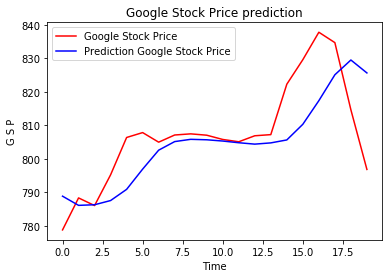

In [30]:
plt.plot(resl_test_set, color = 'red',label = 'Google Stock Price')
plt.plot(pred, color = 'blue',label = 'Prediction Google Stock Price')
plt.title('Google Stock Price prediction')
plt.xlabel('Time')
plt.ylabel('G S P')
plt.legend()
plt.show()